# EECS16A Discussion 13B

## Question 3: Polynomial Fitting

In this discussion, we are trying to fit data (observations) of the form $\{(x_i,y_i),i=1,2,...,n\}$ to a polynomial that we know looks like this:

$$y = f(x) = a_0 + a_1x + a_2x^2 + a_3x^3 + a_4x^4$$

In other words, we want to find $a_0$, $a_1$, $a_2$, $a_3$, and $a_4$ that best fit the data.

More generally, we might want to fit the data to a polynomial of different degree (for instance, if we do not know that the polynomial looks like as above), so we could try to solve for some $a_0,a_1,\ldots,a_d$ that define a $d$-degree polynomial.

Note that the observations are not perfect -- they are *noisy*, which means that $y_i \neq f(x_i)$ in general! That is what makes this problem interesting.

This first block of code contains functions that will help us set up some useful objects -- the polynomial curve for a set of parameters $a_0$, $a_1$, $a_2$, $a_3$, and $a_4$ and a "data" matrix that we will use to compute the least squares estimate later.

In [1]:
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from numpy import pi, cos, exp

%matplotlib notebook

"""Function that defines the polynomial curve for a set of parameters and a range. The set of parameters defines the degree of the
polynomial."""
def poly_curve(params,x_input):
    # params contains the coefficients that multiply the polynomial terms, in degree of lowest degree to highest degree
    degree=len(params)-1
    x_range=[x_input[1], x_input[-1]]
    x=np.linspace(x_range[0],x_range[1],1000)
    y=x*0
    
    for k in range(0,degree+1):
        coeff=params[k]
        y=y+list(map(lambda z:coeff*z**k,x))        
    return x,y
    
"""Function that defines a data matrix for some input data. You'll understand why it's constructed like this after
doing the worksheet!"""
def data_matrix(input_data,degree): 
    # degree is the degree of the polynomial you plan to fit the data with    
    Data=np.zeros((len(input_data),degree+1))
    
    for k in range(0,degree+1):
        Data[:,k]=(list(map(lambda x:x**k ,input_data)))
                  
    return Data
                  
np.random.seed(10)

# Parameters corresponding to the polynomial we want: $y = 1600 + 40x -102x^2 -x^3 + x^4$
smarap=np.array([1600,40,-102,-1,1])/100.0
x_data=np.linspace(-11,11,50)
y_data=np.dot(data_matrix(x_data,4),smarap)+(np.random.rand(len(x_data))-0.5)*10

y_data_training = y_data[0::2]
x_data_training = x_data[0::2]
y_data_test = y_data[1::2]
x_data_test = x_data[1::2]


### Input and output data

`x_data` is the input (set of $x_i$'s), and `y_data` is the output (set of $y_i$'s). Here we plot our test points. Does it look like $y$ should be a quartic polynomial in $x$?

50


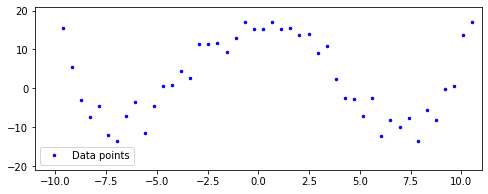

In [2]:
# x_data and y_data have already been defined

fig=plt.figure(figsize=(8,3))
ax=fig.add_subplot(111,xlim=[-11,11],ylim=[-21,21])
x,y=poly_curve(smarap,x_data)
ax.plot(x_data,y_data,'.b',markersize=5)
ax.legend(['Data points'])
print(len(x_data))

### Construct Data Matrix
Use this block to make the data matrix. The input data is given in the array `x_data`, and the output data is given in the array `y_data`.

To construct the data matrix, which we call `DataMat`, you only need to specify what degree polynomial you will use to fit the data.

If `x_data` has the form `x_{data}`$ =\begin{bmatrix}x_1\\x_2\\ \vdots \\x_n \end{bmatrix}$, then `DataMat` has the form `DataMat` $=\begin{bmatrix}1 &x_1&x_1^2& \cdots &x_1^d\\1 &x_2&x_2^2& \cdots &x_2^d\\ \vdots & \vdots & \vdots & \ddots & \vdots \\1 &x_n&x_n^2& \cdots &x_n^d \end{bmatrix}$, where $d$ is the degree of the polynomial. 

In [3]:
degree=4
DataMat=data_matrix(x_data,degree)

### Least Squares
Recall the system of equations we are trying to solve here:

$$\texttt{DataMat}\vec{a} = \vec{y},$$ where $\vec{a} = \begin{bmatrix}a_0\\a_1\\:\\a_d\end{bmatrix}$ and $\vec{y} = \begin{bmatrix}y_1\\y_2\\ : \\y_n \end{bmatrix}$.

Why does this make sense? Think about it.

In the next block, you will implement code to compute $\vec{a}$, the set of optimal polynomial coefficients (optimal in a least squares sense) to fit the data. Put the coefficients in a $(d+1)$ dimensional numpy array called params.

In [4]:
D = DataMat

# Least Squares
params = np.linalg.solve(np.dot(np.transpose(D), D), np.dot(np.transpose(D),y_data))

### Plot Curve Fit
Use the next block to compare your fitted polynomial to the data. All you need to do is enter the polynomial coefficients (in degree of lowest degree to highest degree) into an array called params. 

Once you're done, re-run all the blocks of code for different degrees $d$! What do you observe?

19.275906555946552


Text(0.5, 1.0, 'Polynomial of Degree 4, cost=19.275907')

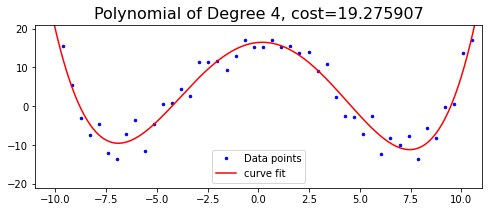

In [5]:
cost=np.linalg.norm(y_data-np.dot(DataMat,params))
print(cost)

fig=plt.figure(figsize=(8,3))
ax=fig.add_subplot(111,xlim=[-11,11],ylim=[-21,21])
x,y=poly_curve(params,x_data)

ax.plot(x_data,y_data,'.b',markersize=5)
ax.plot(x,y,'r') 
ax.legend(['Data points','curve fit'])
plt.title('Polynomial of Degree %d, cost=%f' %(len(params)-1,cost),fontsize=16)